## Emotion Prediction by Input Image

Image loaded successfully.
Detected 1 face(s).
1/1 [==============================] - 0s 342ms/step


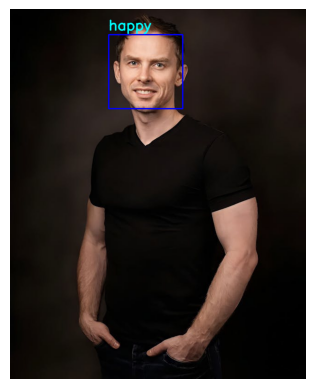

In [35]:
import cv2
import numpy as np
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import matplotlib.pyplot as plt

# Load the model
model = model_from_json(open("model.json", "r").read())
model.load_weights('model.h5')

# Initialize face detection
face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load an image
image_path = r"C:\Users\Maverick\Downloads\leonardo.jpg"  # Update this to your image path
image = cv2.imread(image_path)
if image is None:
    print("Could not read the image.")
    exit()

print("Image loaded successfully.")

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_haar_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

if len(faces) == 0:
    print("No faces detected.")
else:
    print(f"Detected {len(faces)} face(s).")

# Process each face found
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray_image[y:y+h, x:x+w]
    roi_gray = cv2.resize(roi_gray, (48, 48))
    image_pixels = img_to_array(roi_gray)
    image_pixels = np.expand_dims(image_pixels, axis=0)
    image_pixels /= 255

    predictions = model.predict(image_pixels)
    max_index = np.argmax(predictions[0])
    emotion_detection = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    emotion_prediction = emotion_detection[max_index]
    cv2.putText(image, emotion_prediction, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2, cv2.LINE_AA)

# Show the image with emotions annotated
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()


## Emotion Prediction In Live Camera 

In [25]:
import cv2
import numpy as np
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.image import img_to_array
from IPython.display import display, clear_output
from PIL import Image
import io
import time

# Load the model
model = model_from_json(open("model.json", "r").read())
model.load_weights('model.h5')

# Initialize face detection
face_haar_cascade = cv2.CascadeClassifier('static/haarcascade_frontalface_default.xml')

# Start video capture
cap = cv2.VideoCapture(0)

try:
    while True:
        start_time = time.time()
        frames = []

        # Capture frames for the next 5 seconds
        while time.time() - start_time < 3:
            res, frame = cap.read()
            if not res:
                break  # Break properly if the webcam fails
            frames.append(frame)
            time.sleep(0.1)  # Capture interval

        # Process captured frames
        for frame in frames:
            gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = face_haar_cascade.detectMultiScale(gray_image, 1.1, 4)

            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
                roi_gray = gray_image[y:y+h, x:x+w]
                roi_gray = cv2.resize(roi_gray, (48, 48))
                image_pixels = img_to_array(roi_gray)
                image_pixels = np.expand_dims(image_pixels, axis=0)
                image_pixels /= 255

                predictions = model.predict(image_pixels)
                max_index = np.argmax(predictions[0])
                emotion_detection = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
                emotion_prediction = emotion_detection[max_index]
                cv2.putText(frame, f"Sentiment: {emotion_prediction}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (10, 10, 255), 2)

            # Convert frame to RGB and display
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            im = Image.fromarray(frame)
            bio = io.BytesIO()
            im.save(bio, format='JPEG')
            display(Image.open(bio))
            clear_output(wait=True)

        # Prompt to continue or stop
        if input("Continue? Enter 'no' to stop: ").strip().lower() == 'no':
            break

finally:
    cap.release()


KeyboardInterrupt: Interrupted by user